# EDA y primer modelo - Grupo03
### Authors
- César López Mantecón - 100472092
- Manuel Gómez-Plana Rodríguez - 100472310

### Repositorio
Esta práctica se ha llevado a cabo en [este repositorio de github](https://github.com/CLopMan/aprendizajeAutomatico-G03)


## Índice
...

## Introducción
En este *notebook* se recoge el Análisis de Datos Exploratorio (EDA, por sus siglas en inglés[1]) además de la selección y entrenamiento del primer modelo de *machine learning* empleado para la resolución del problema. El EDA de los siguientes pasos: ajuste de datos, determinación de características e instancias, análisis de variables e instancias (estudio de la relación entre variables y existencia de valores nulos -- TODO: borrar este paréntesis) y modelización del problema.

Tras el EDA, haremos un análisis de la evaluación *outer* e *inner* junto con la decisión de las métricas usadas. Luego, decidiremos el método de escalado más adecuado usando el KNN como algoritmo, para luego probar varios modelos para poder decidir cual es el mejor.

---

[1]: IBM, "Análisis de datos exploratorio". IBM. https://www.ibm.com/es-es/topics/exploratory-data-analysis (acceso: 28 de febrero de 2024)

## Contexto del problema
Creo que podría quedar bien decir qué pretendemos hacer, cuál es la variable objetivo y demás. 

## EDA - 1. Análisis preliminar
Usaremos el módulo `pandas` para analizar los datos. Esto nos permitirá usar la herramienta de *dataframes* con el fin anterior.
Primero, mostraremos las primeras y últimas filas del *dataframe* para hacernos una idea preliminar de los datos. Además, haremos un recuento de instancias para ver las dimensiones del conjunto de datos. 

In [15]:
import pandas as pd

raw_data = pd.read_csv("wind_ava.csv.gz", compression='gzip') # lectura del fichero en bruto
print(raw_data.head()) # primeras filas
print(raw_data.tail()) # últimas filas
print("========DIMENSIONES========")
print("nº filas = " + str(len(raw_data)) + "\nnº columnas = " + str(len(csv.columns)))


              datetime   energy     p54.162.1     p54.162.2     p54.162.3  \
0  2005-01-02 18:00:00   402.71  2.534970e+06  2.526864e+06  2.518754e+06   
1  2005-01-03 00:00:00   696.80  2.537369e+06  2.529277e+06  2.521184e+06   
2  2005-01-03 06:00:00  1591.15  2.533727e+06  2.525703e+06  2.517678e+06   
3  2005-01-03 12:00:00  1338.62  2.534491e+06  2.526548e+06  2.518609e+06   
4  2005-01-03 18:00:00   562.50  2.529543e+06  2.521623e+06  2.513702e+06   

      p54.162.4     p54.162.5     p54.162.6     p54.162.7     p54.162.8  ...  \
0  2.510648e+06  2.502537e+06  2.531111e+06  2.522721e+06  2.514330e+06  ...   
1  2.513088e+06  2.504995e+06  2.533465e+06  2.525088e+06  2.516716e+06  ...   
2  2.509654e+06  2.501629e+06  2.529801e+06  2.521496e+06  2.513187e+06  ...   
3  2.510670e+06  2.502732e+06  2.530569e+06  2.522346e+06  2.514127e+06  ...   
4  2.505782e+06  2.497861e+06  2.525621e+06  2.517421e+06  2.509215e+06  ...   

    v100.16   v100.17   v100.18   v100.19   v100.20   v1

Observamos que se trata de un conjunto de datos con **4748 instancias y 552 *features*** a priori numéricas. Para obtener más información del mismo haremos uso del método `df.info()` y del atributo `df.dtypes`.

In [16]:
print(raw_data.info())
print(raw_data.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4748 entries, 0 to 4747
Columns: 552 entries, datetime to v100.25
dtypes: float64(551), object(1)
memory usage: 20.0+ MB
None
datetime      object
energy       float64
p54.162.1    float64
p54.162.2    float64
p54.162.3    float64
              ...   
v100.21      float64
v100.22      float64
v100.23      float64
v100.24      float64
v100.25      float64
Length: 552, dtype: object


Gracias a esta información, sabemos 551 de las 552 *features* son de tipo numérico (concretamente, números en coma flotante de doble precisión). Además, vemos que *datetime* es la única característica no numérica. No obstante, al modelar una marca de tiempo se podría convertir a numérica si fuera necesario. Observamos también que, a escepción de *energy* y *datetime*, las variables se pueden relacionar fácilmente con la localización a la que hacen referencia a través del nombre de la columna en el dataframe. 
Con esto, concluímos esta sección con un breve resumen de las conclusiones extraídas. 
- El conjunto de datos cuenta con 4748 instancias.
- Cada instancia cuenta con 551 características del tipo numérico y un objeto *str* fácilmente convertible a numérico.
- Los datos están ligados a una localización fácilmente observada en el nombre de la columna.

## EDA - 2.Ajuste y primer análisis de datos
En este apartado haremos un pequeño preprocesado de los datos para eliminar la instancias que no son relevantes para el problema propuesto.
Para ello, eliminaremos todos los datos que no hagan referencia a la localización "Sotavento". Además, volvemos a imprimir información sobre el *dataframe* transformado para observar los cambios después de esta operación. 

In [14]:
sotavento = raw_data.filter(regex='13$|energy|datetime') # eliminacion de instancias no referentes a Sotavento

print(sotavento.info())
print(sotavento.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4748 entries, 0 to 4747
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    4748 non-null   object 
 1   energy      4748 non-null   float64
 2   p54.162.13  4748 non-null   float64
 3   p55.162.13  4748 non-null   float64
 4   cape.13     4748 non-null   float64
 5   p59.162.13  4748 non-null   float64
 6   lai_lv.13   4748 non-null   float64
 7   lai_hv.13   4748 non-null   float64
 8   u10n.13     4748 non-null   float64
 9   v10n.13     4748 non-null   float64
 10  sp.13       4748 non-null   float64
 11  stl1.13     4748 non-null   float64
 12  u10.13      4748 non-null   float64
 13  v10.13      4748 non-null   float64
 14  t2m.13      4748 non-null   float64
 15  stl2.13     4748 non-null   float64
 16  stl3.13     4748 non-null   float64
 17  iews.13     4748 non-null   float64
 18  inss.13     4748 non-null   float64
 19  stl4.13     4748 non-null  

Comprobamos que este *feature space* es un espacio 24-dimensional con 4748 instancias. Al filtrar otras localizaciones hemos reducido drásticamente el número de variables a tener en cuenta. En la salida del código anterior también podemos observar que **no existen valores nulos en ninguna instancia** ya que el valor `Non-Null Count` es igual al número de instancias para todas las variables [*]. 

[*] Nota: téngase en cuenta que, dependiendo del tamaño de la pantalla y el visualizador del *notebook* la salida del código anterior puede haber sido truncada. Recomendamos copiar la salida a un visualizador de texto cualquiera para poder observarla sin problemas. 

## EDA - 3. Análisis de variables e Instancias

A continuación, estudiaremos el conjunto de datos para comprobar la existencia de relaciones entre variables, con el fin concer en profundidad el conjunto de datos, así como de de limpiarlo de variables que no sean relevantes para el estudio. Para ello, analizaremos en profundidad cada instancia con el fin de detectar valores atípicos y la existencia de correlación entre las mismas o con la variable objetivo.
Primero, extraeremos un conjunto de estadísticas descriptivas del conjunto de datos: 

In [17]:
print(sotavento.describe())

            energy    p54.162.13   p55.162.13      cape.13    p59.162.13  \
count  4748.000000  4.748000e+03  4748.000000  4748.000000  4.748000e+03   
mean    693.126247  2.489477e+06    16.008810    31.166541  1.706692e+06   
std     665.531609  4.482599e+04     6.552216   121.758977  1.466953e+06   
min       0.010000  2.358748e+06     1.650268     0.000000  5.610341e+04   
25%     144.170000  2.458543e+06    11.203264     0.000000  6.563209e+05   
50%     465.305000  2.490478e+06    15.543441     1.004148  1.239176e+06   
75%    1089.375000  2.525134e+06    20.214077    14.143328  2.296548e+06   
max    2792.550000  2.580387e+06    39.230807  2311.662152  1.110694e+07   

         lai_lv.13    lai_hv.13      u10n.13      v10n.13         sp.13  ...  \
count  4748.000000  4748.000000  4748.000000  4748.000000   4748.000000  ...   
mean      2.815222     2.576284     0.386215     0.120528  97820.301287  ...   
std       0.397377     0.116434     3.100583     3.016766    713.689654  ..

En la tabla anterior podemos observar la media; desviación estándar; mínimo; valores del primer, segundo y tercer cuartil; y máximo de cada una de las *features*. Para complementar estos datos se han generado diferentes gráficos de cada variable para tener una idea de la distribución de los datos. Para la generación de gráficas nos valdremos de los módulos `mathplotlib` y `seaborn`.

### Diagramas de barras

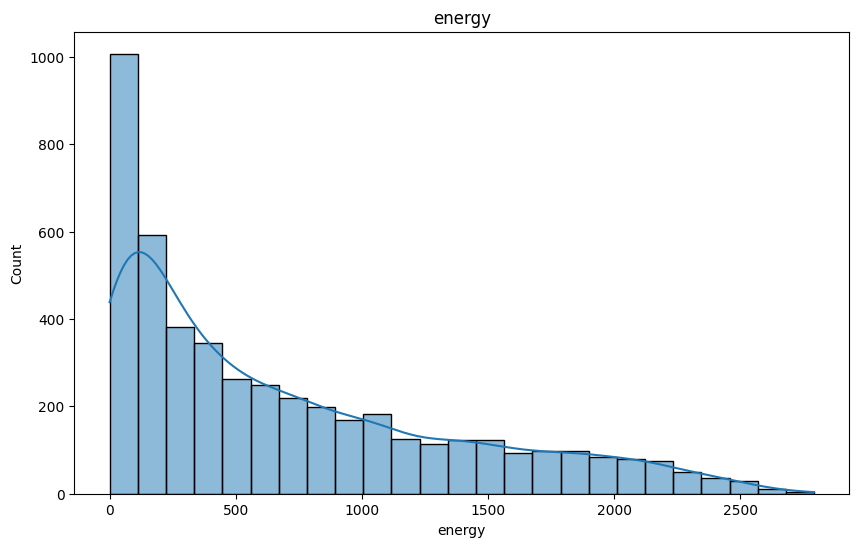

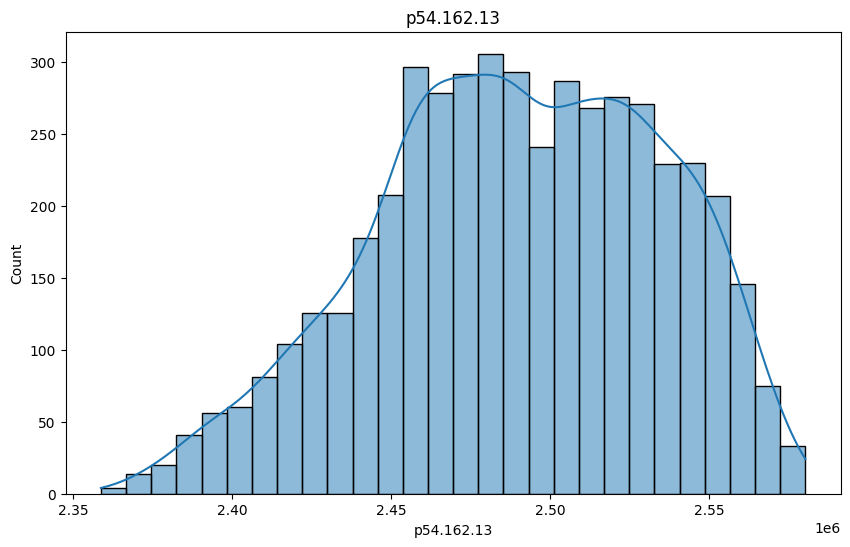

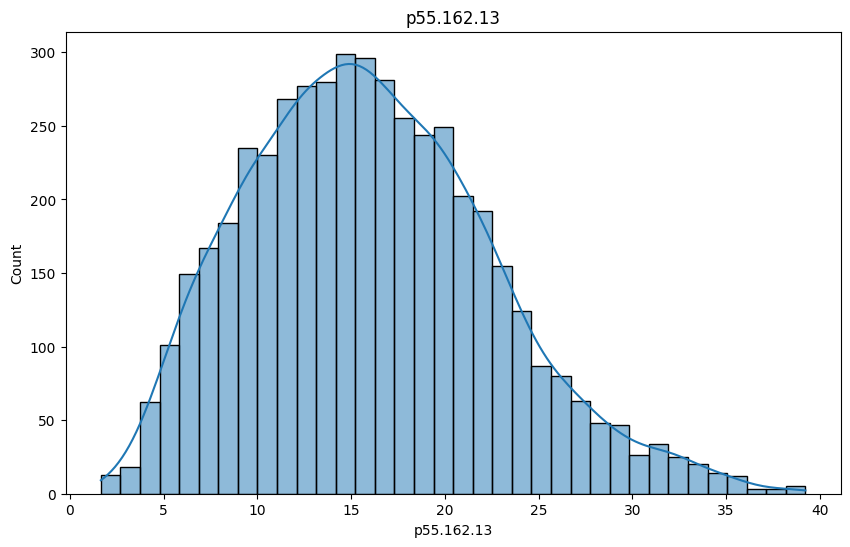

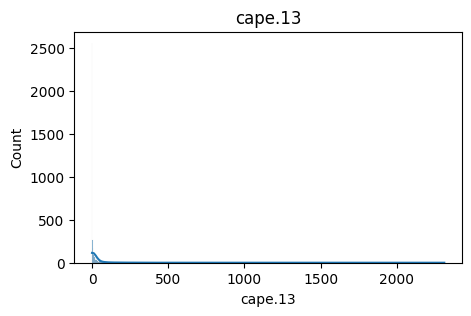

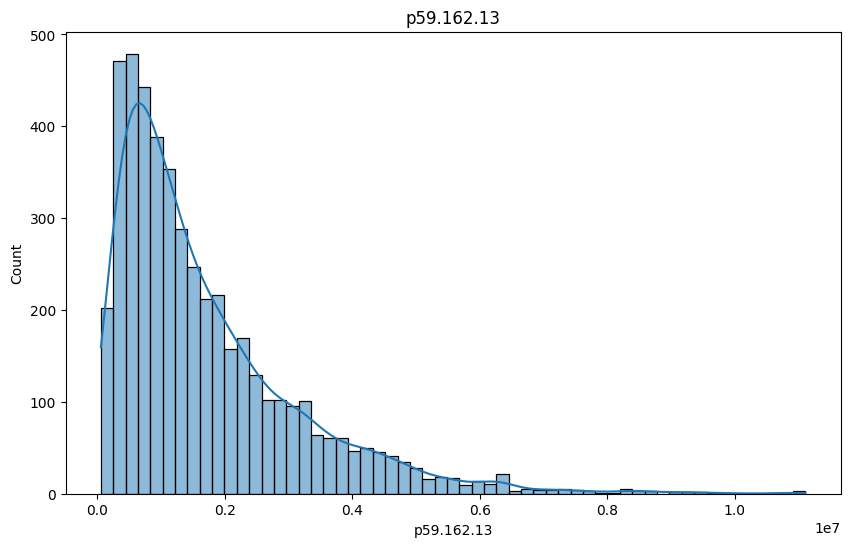

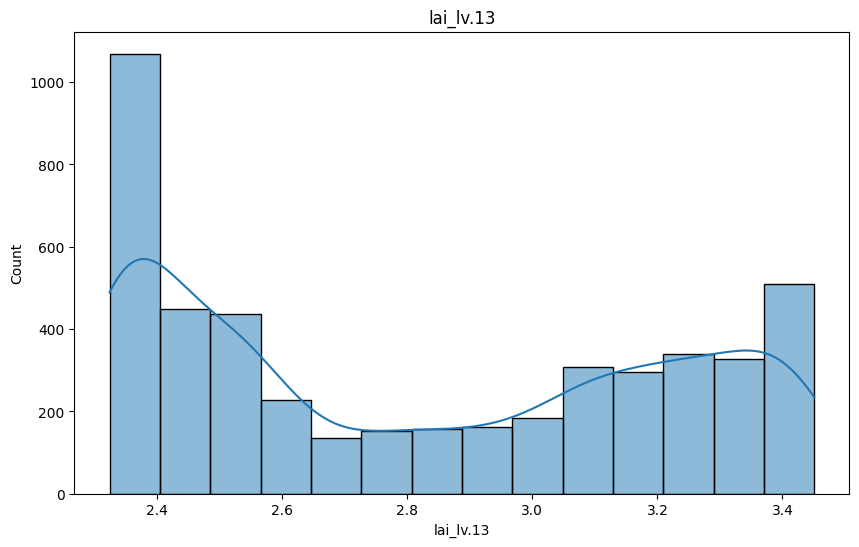

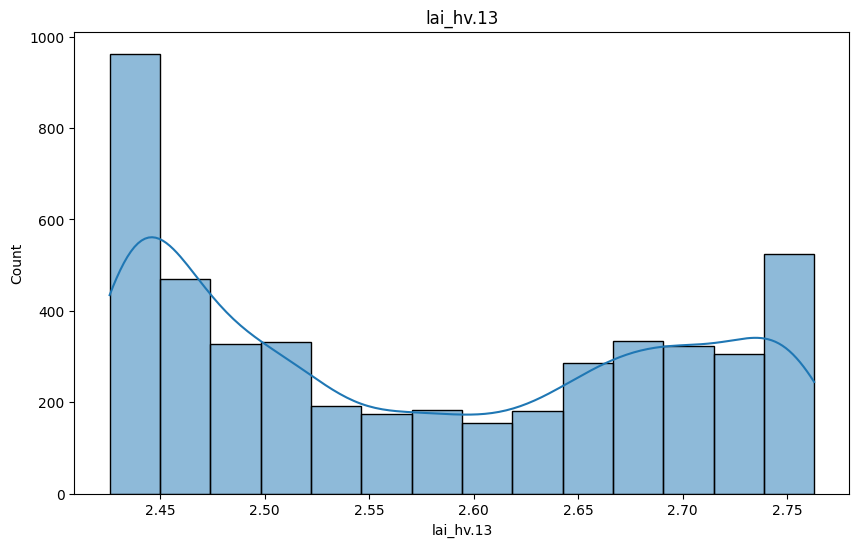

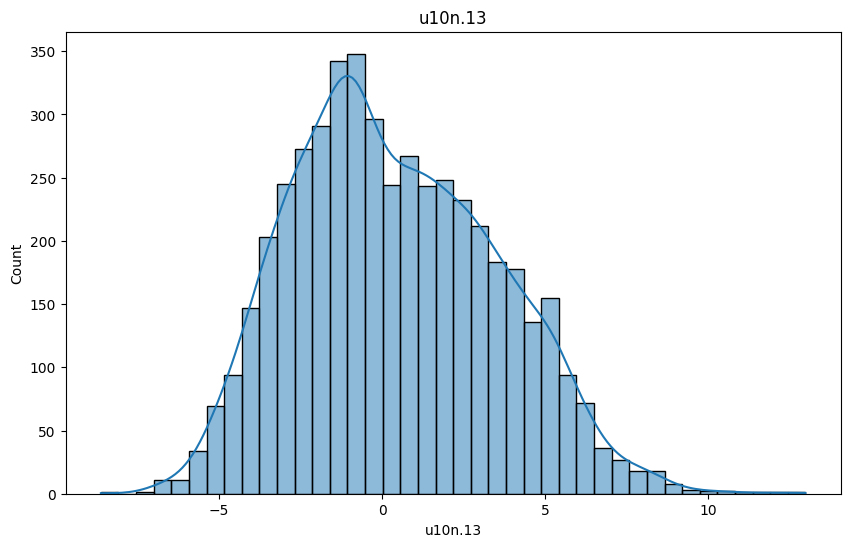

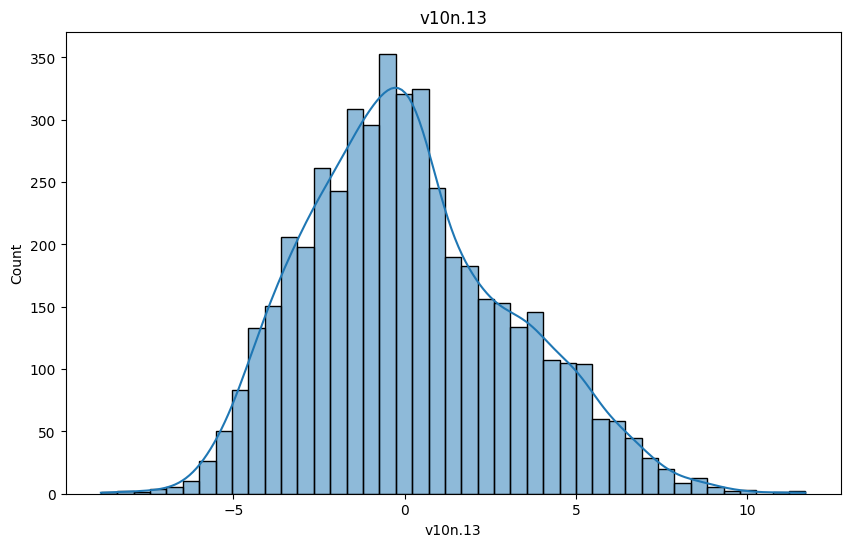

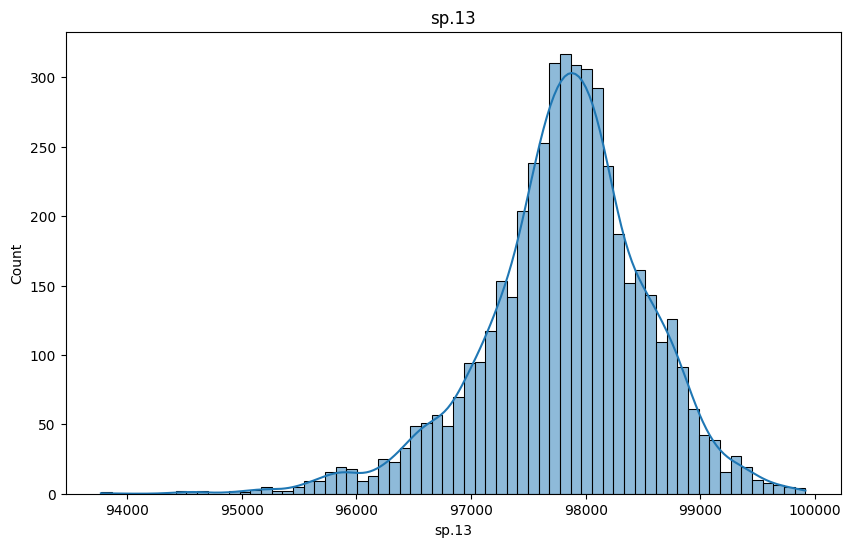

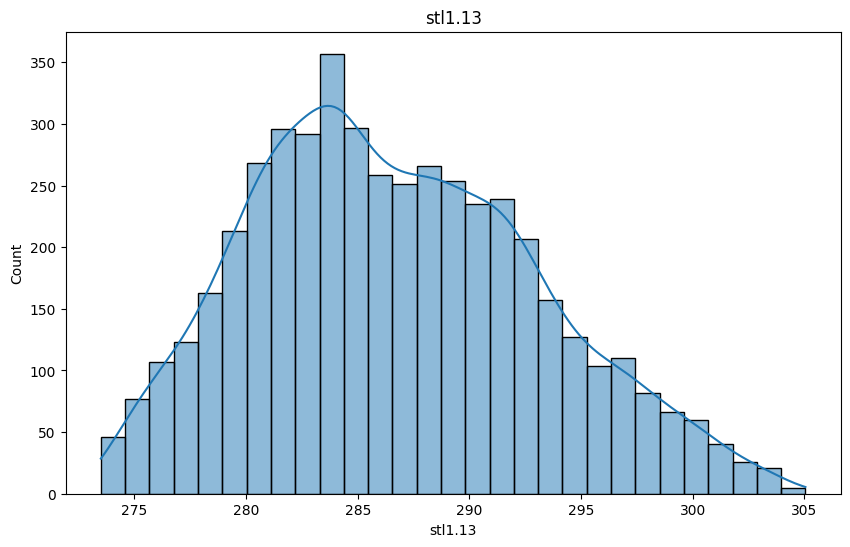

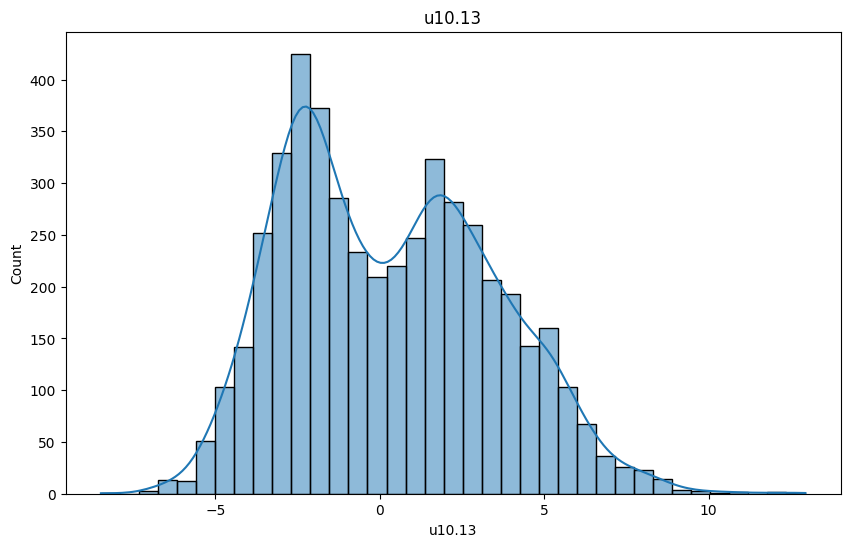

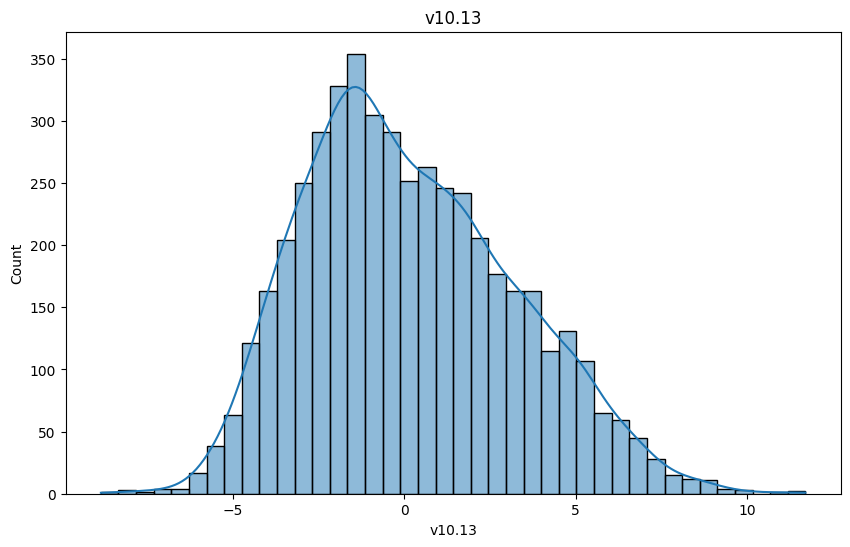

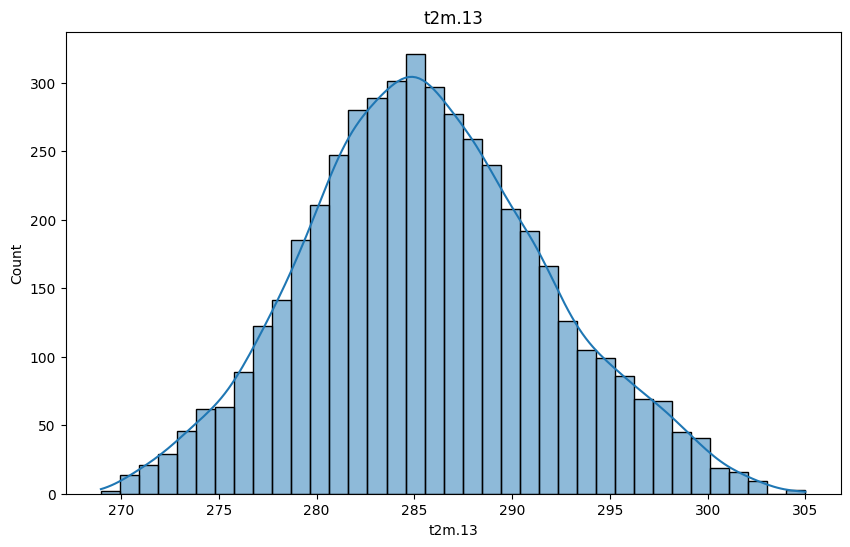

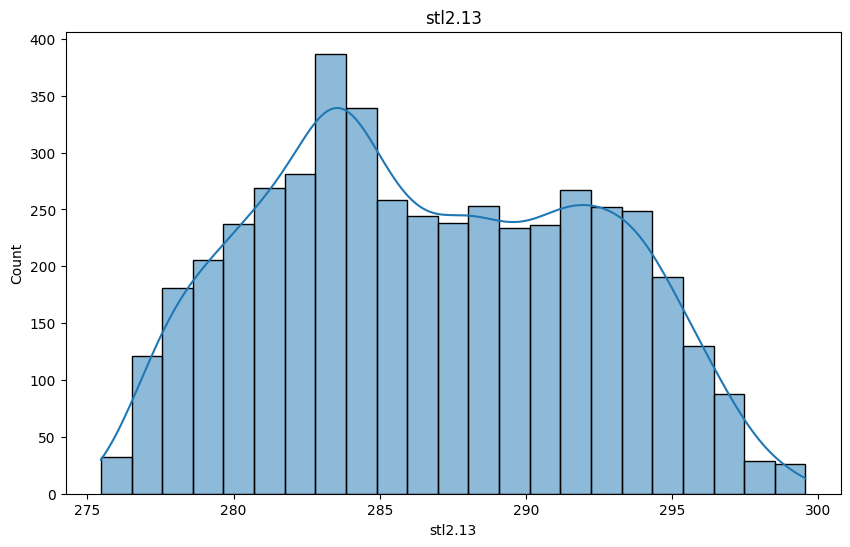

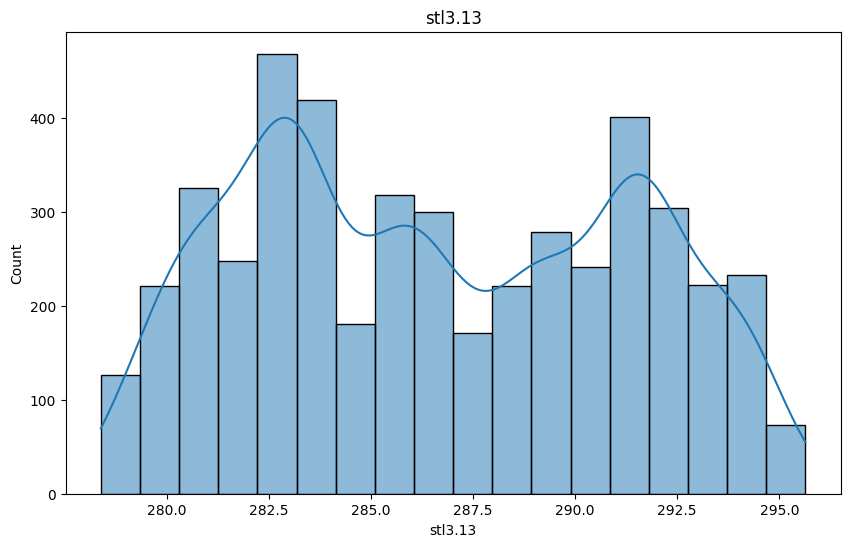

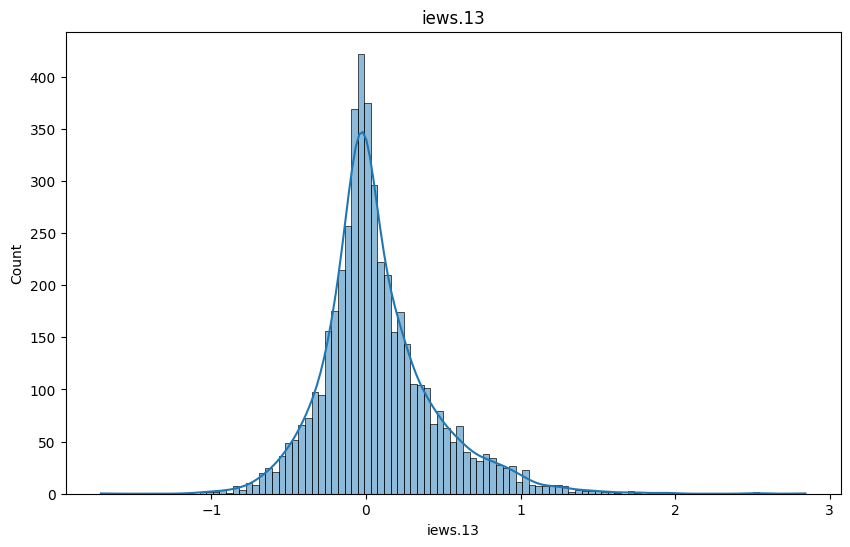

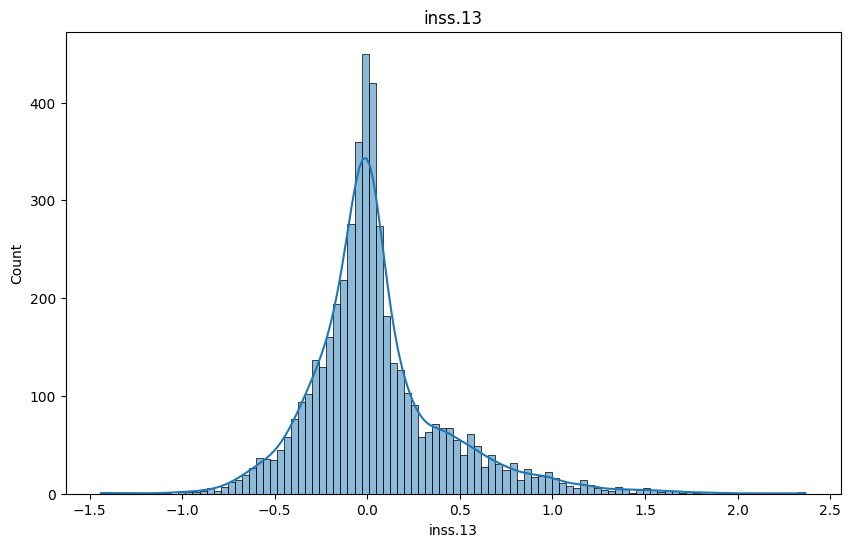

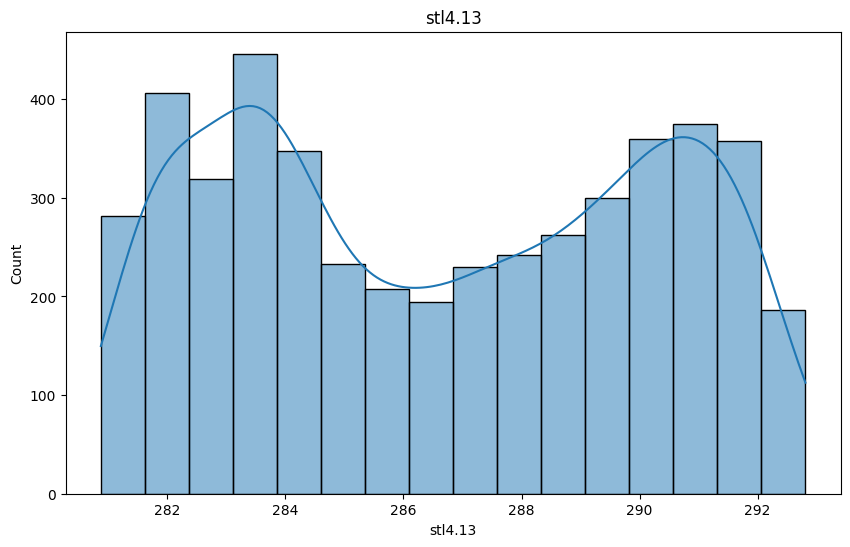

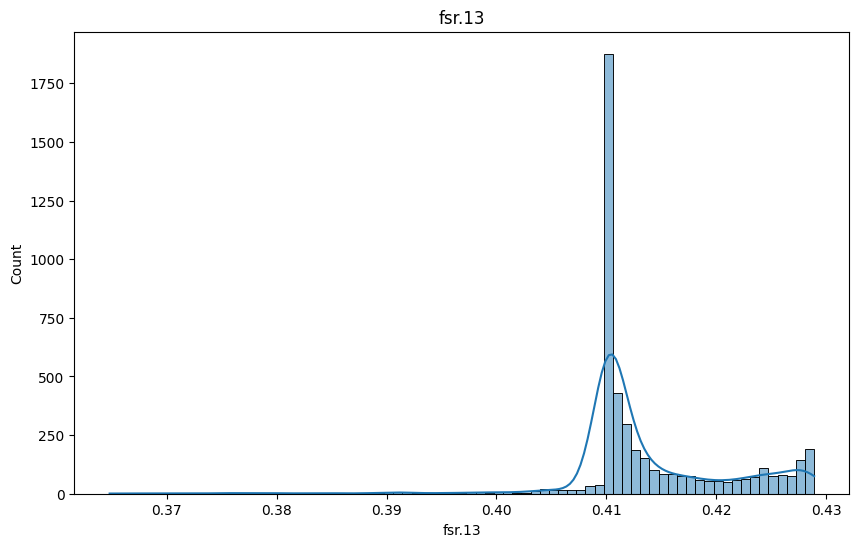

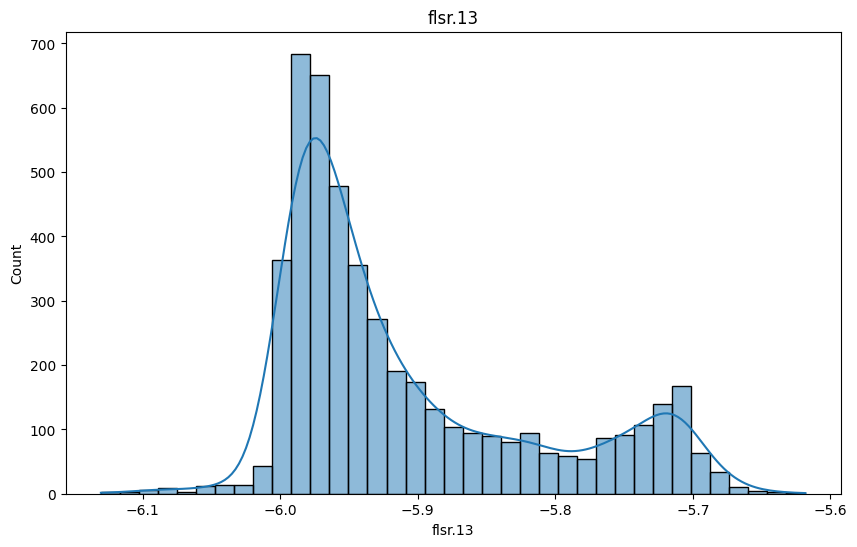

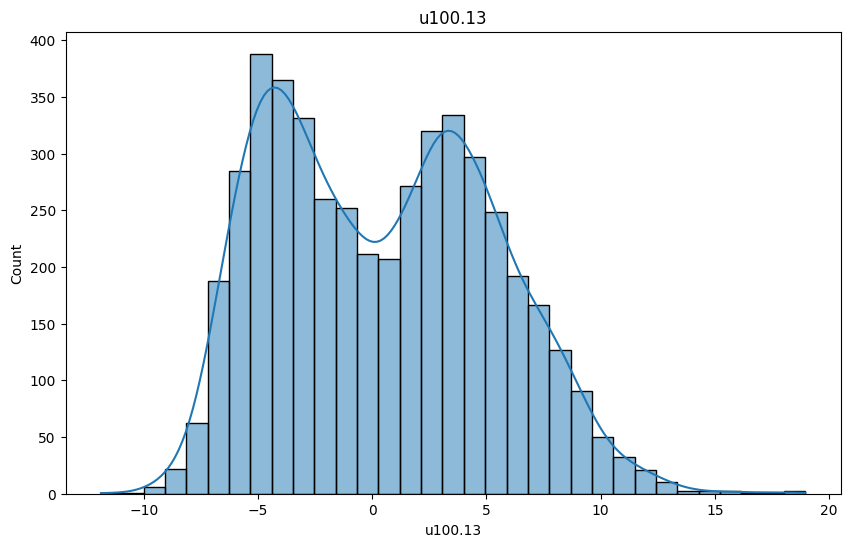

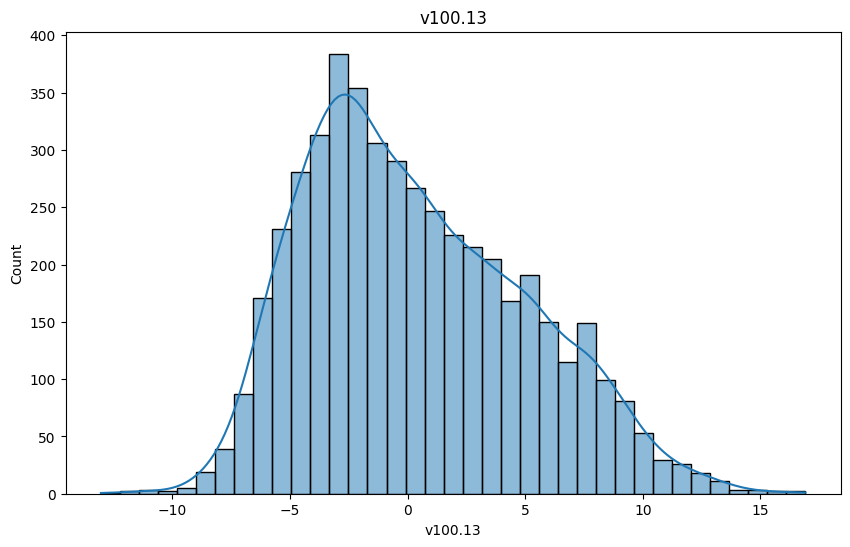

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))

columns = list(sotavento.columns)
columns.remove('datetime') # no relevante, marca de tiempo

for _ in columns:
    sns.histplot(sotavento[_], kde=True)
    plt.title(str(_))
    plt.show()

### Diagramas de dispersión

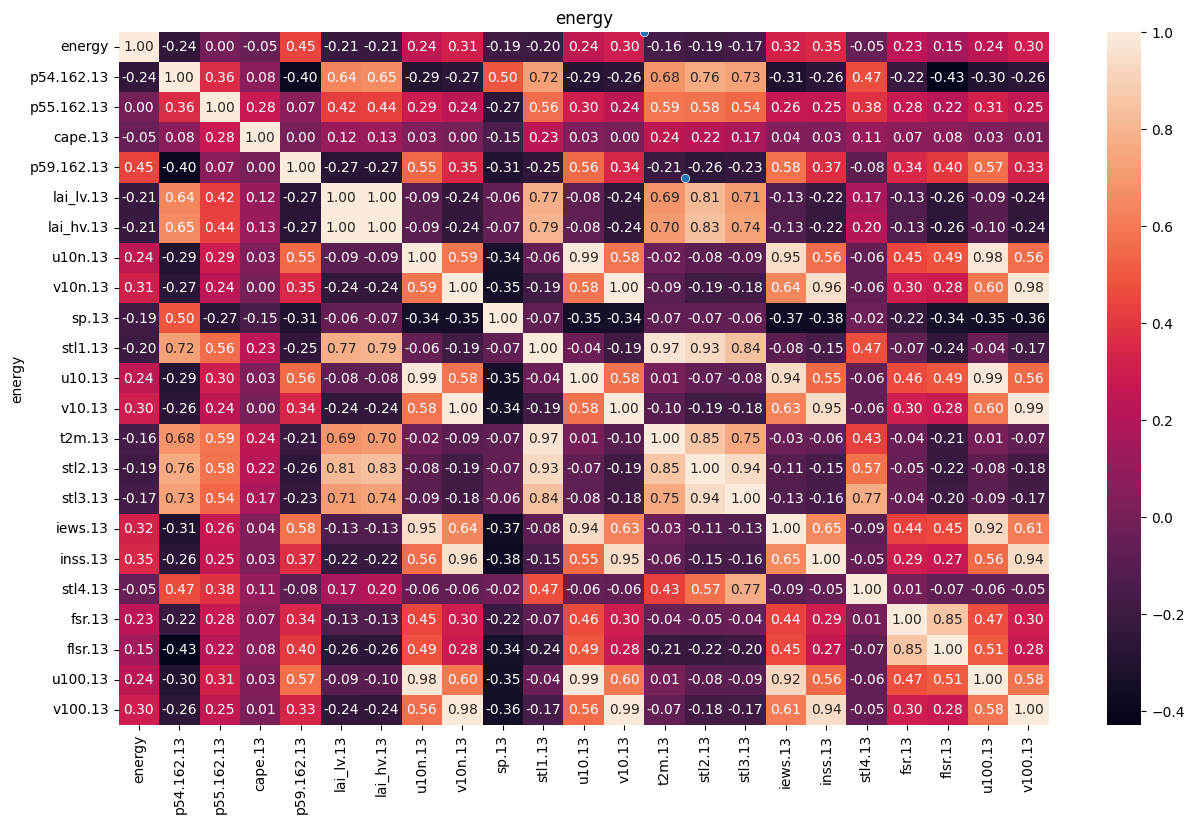

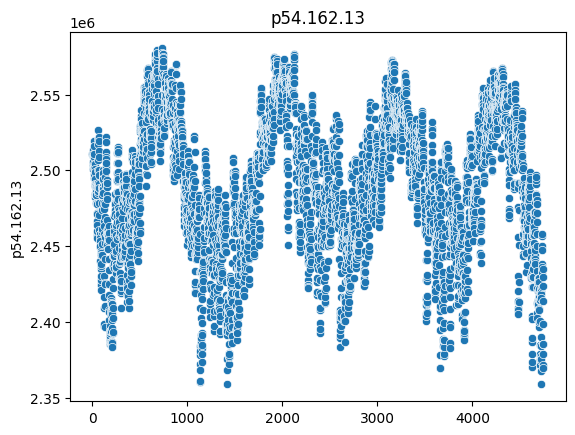

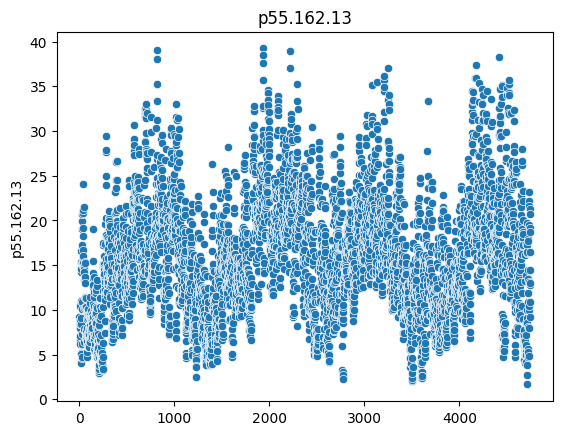

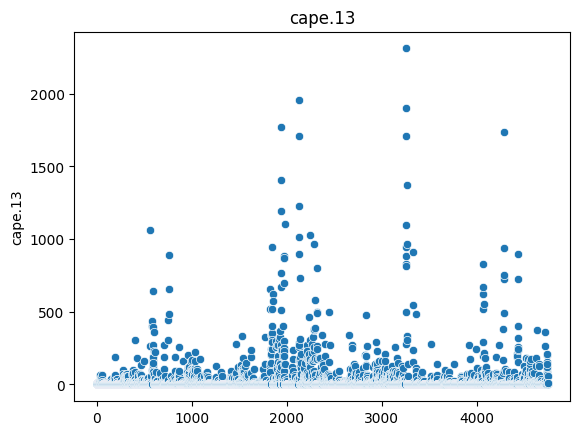

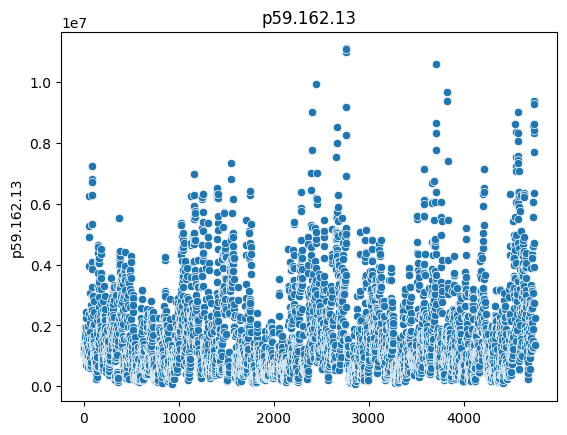

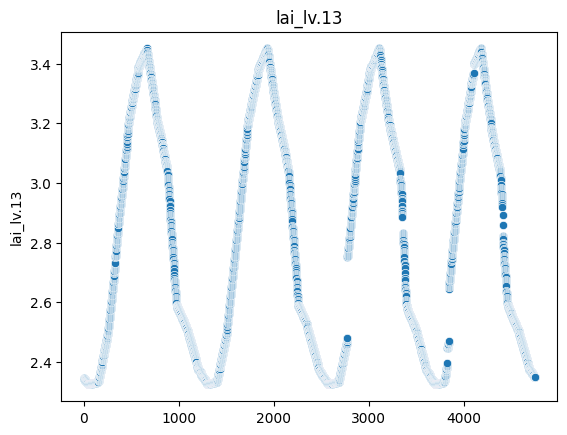

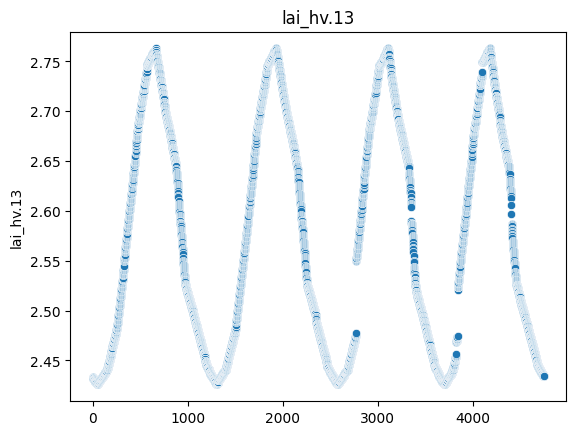

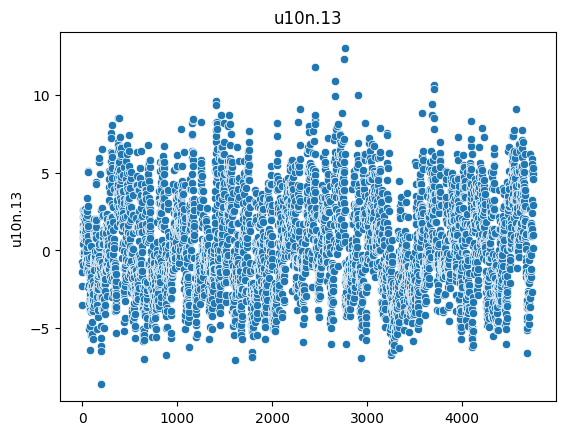

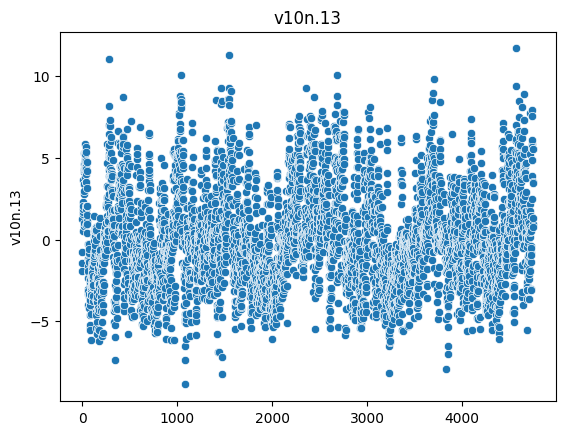

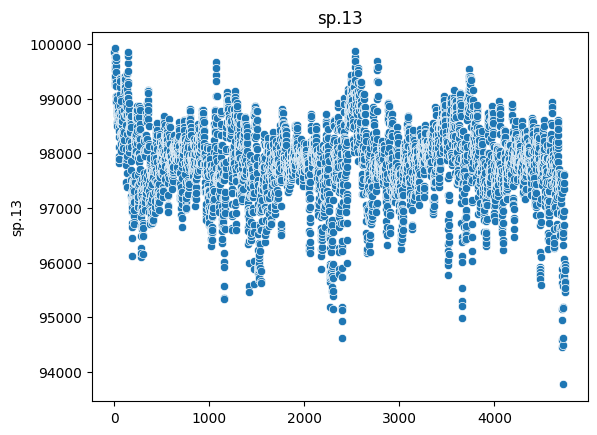

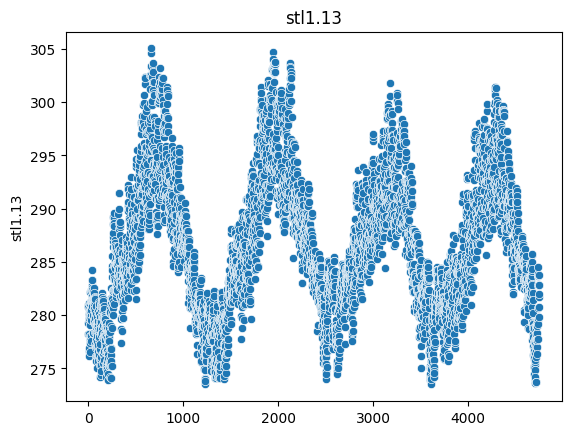

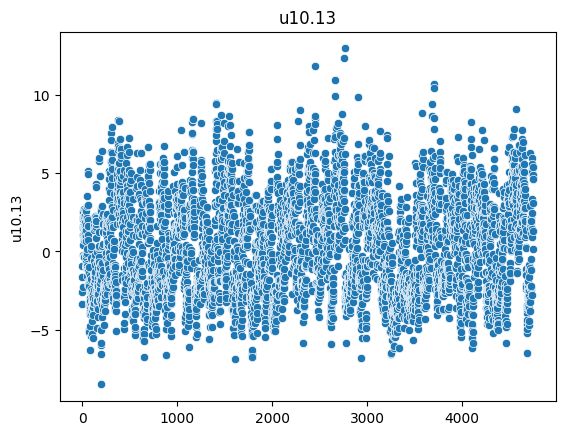

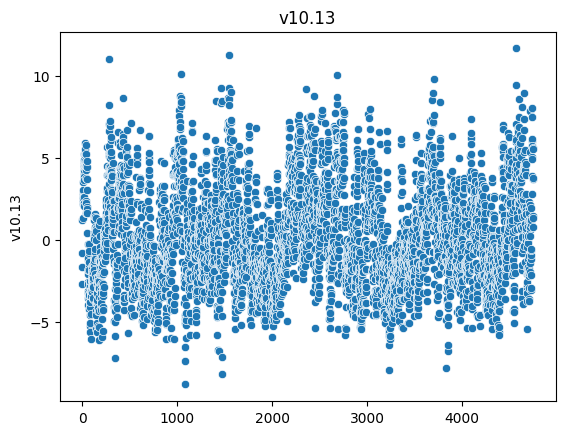

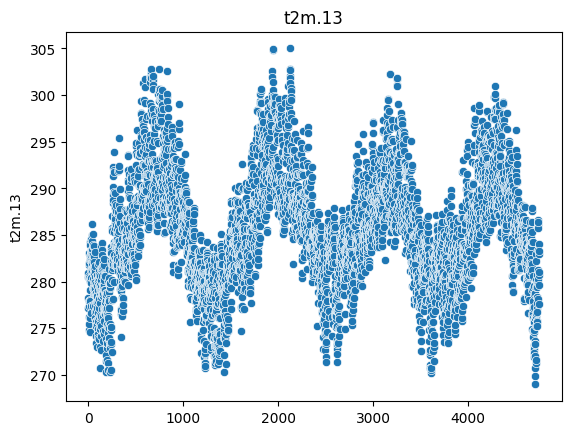

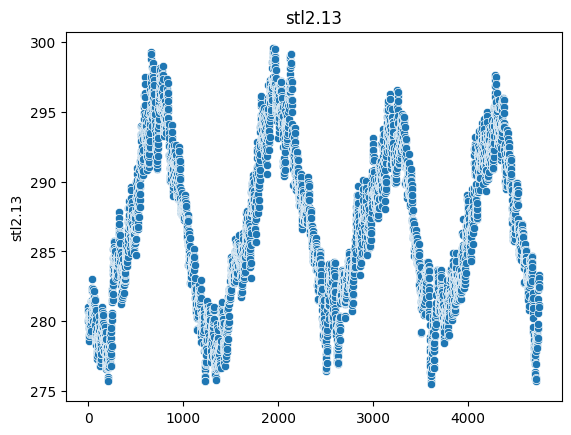

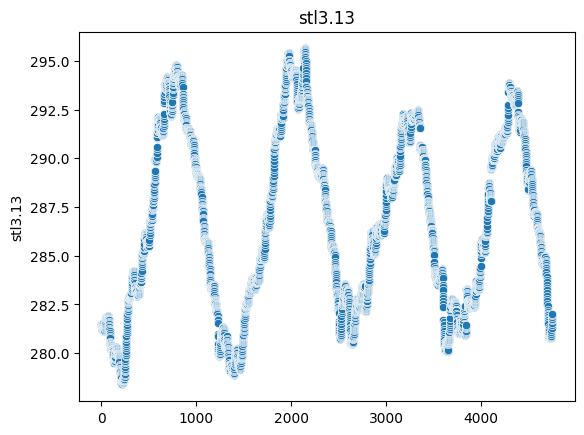

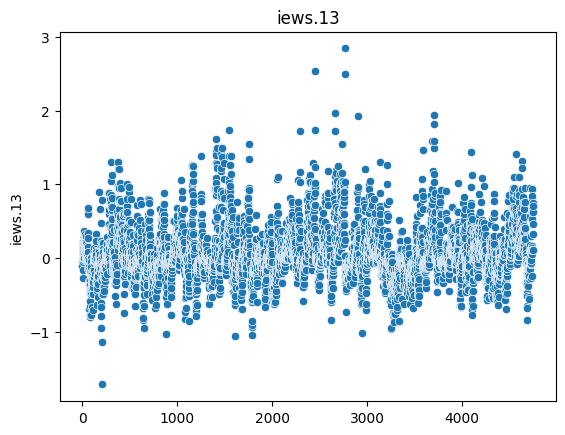

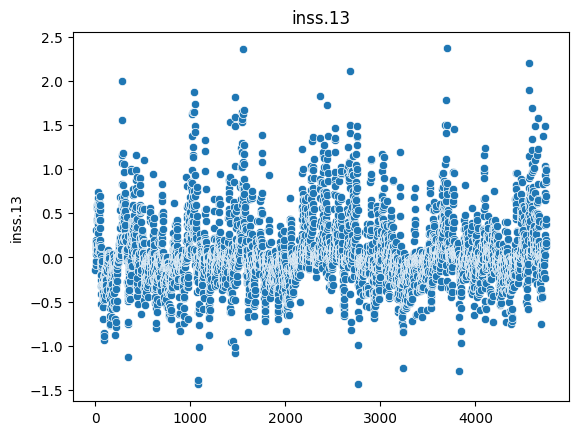

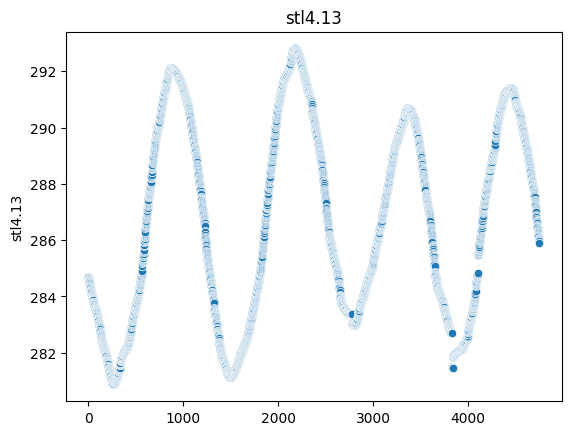

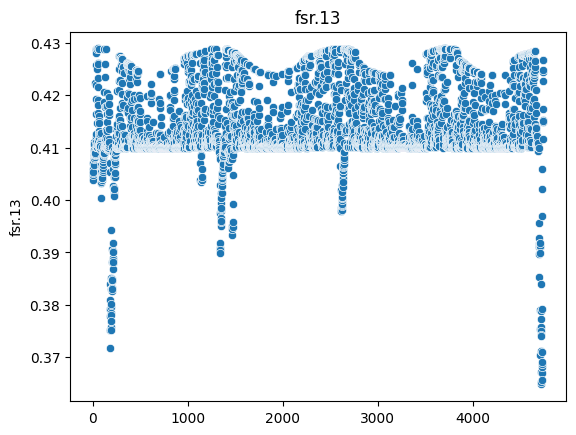

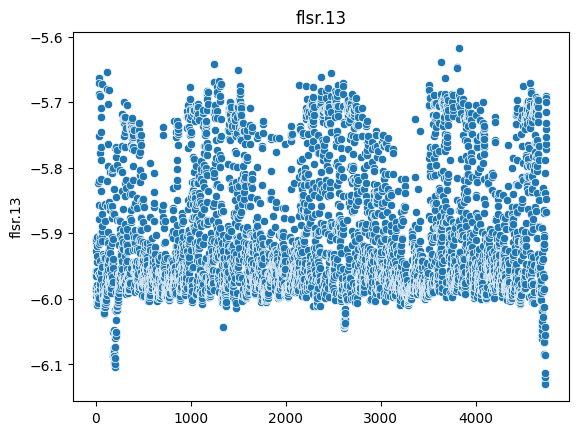

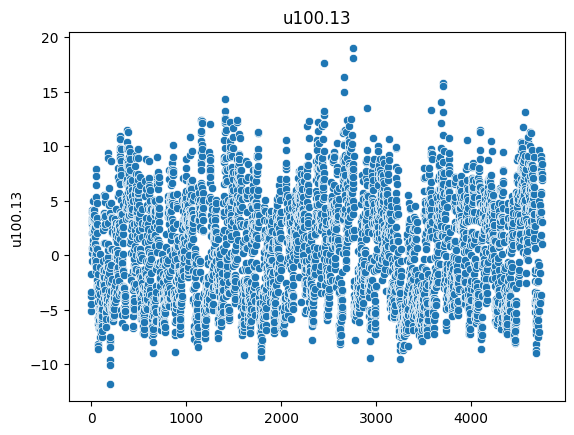

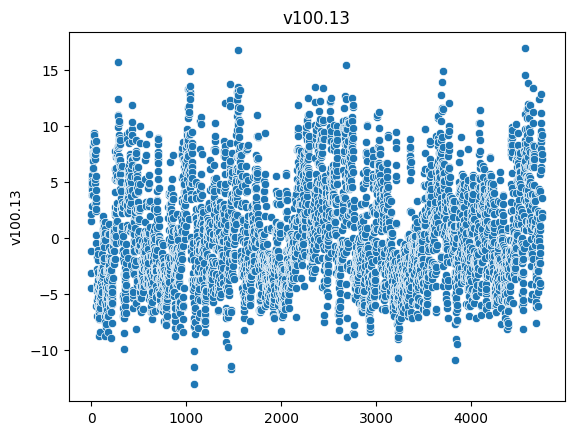

In [26]:
plt.figure(figsize=(15, 9))

columns = list(sotavento.columns)
columns.remove('datetime') # no relevante, marca de tiempo
aux = sotavento.select_dtypes(include=['float64'])
sns.heatmap(aux.corr(), annot=True, fmt=".2f")


for _ in columns:
    sns.scatterplot(sotavento[_], )
    plt.title(str(_))
    plt.show()

### Existencia de valores atípicos



### Estudio de correlaciones
Al representar la correlación de 

### Existencia de columnas constantes

Para comprobar la existencia de columnas constantes. Debido a la naturaleza de los datos, se considerará que dos valores son distintos si difieren en más de un 1% del valor más grande. A través del siguiente código vemos que **no existen columnas constantes**.

In [ ]:
for j in range(0, 1, 1):
 same_date = True
 same_day = True
 i = 0
 while((same_date or same_day) and i < len(csv)-1):
  if (csv.iloc[i, j] != csv.iloc[i+1,j]):
   same_date = False
  if (csv.iloc[i, j][0:10] != csv.iloc[i+1,j][0:10]):
   same_day = False
  i += 1
 if same_date:
  print("The datetime values", str(j), "are constant.")
 if same_day:
  print("The values", str(j), "are from the same day")

for j in range(1, len(csv.columns), 1):
 same = True
 i = 0
 while (same and i < len(csv)-1):
  if (csv.iloc[i+1, j] < 0.99*csv.iloc[i, j] or csv.iloc[i+1,j] > 1.01*csv.iloc[i,j]):
   same = False
  i += 1
 if same:
  print("The values of the column", str(j), "are constant.")

# EDA - 4.Tipo de problema
Tras estos análisis, debemos instanciar este problema como un problema de **Clasificación** o de **Regresión**. Lo primero que debemos saber para realizar esta clasificación, es saber la variable que tenemos que predecir, es decir, **energía**. Con los bloques de código anteriores, hemos visto que la energía es un valor discreto, por lo que podemos asumir que el modelo intenta resolver un problema de **Regresión**.

Por esto, podemos decir, adicionalmente, que al estimar un valor según unas variables, se trata de un problema del tipo aprendizaje **atributo-valor*. Además, como tenemos los valores de **energía**, podemos decir que se trata de un problema de aprendizaje supervisado.